<a href="https://colab.research.google.com/github/Nushwa/ML/blob/main/Malaria_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#-------------------------------------------------------------------------------------------
import pandas as pd
import numpy as np
import os

# Plot Figures:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from skimage import transform
from sklearn.model_selection import train_test_split


In [29]:

from pathlib import Path
import tensorflow as tf
import keras


In [32]:
from keras.preprocessing import image

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/Malaria Detection/DATASET.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [20]:
parasitized_path = Path('/tmp/DATASET/cell_images') / 'Parasitized'
not_parasitized_path = Path('/tmp/DATASET/cell_images') / 'Uninfected'

parasitized_path.is_dir()
not_parasitized_path.is_dir()

True

In [21]:
images = []
labels = []

# setting the new shape of image:
new_shape = (50, 50, 3)

In [35]:
import warnings;
warnings.filterwarnings('ignore');

# Load all the non-malaria images and setting their Y label as 0
for img in not_parasitized_path.glob("*.png"):
    img = keras.utils.load_img(img)
    # Convert the image to a numpy array
    image_array = keras.utils.img_to_array(img)
    
    #Data Augmentation
    # resize the image:
    image_array = transform.resize(image_array, new_shape, anti_aliasing=True)
    
    # scaling the image 
    image_array /= 255
    images.append(image_array)

    #'not parasitized' image, value should be 0
    labels.append(0)

27558

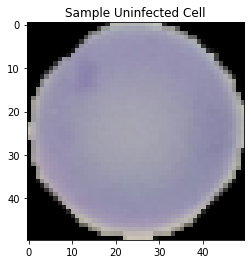

In [38]:
plt.imshow(images[0])
plt.title('Sample Uninfected Cell')
"Dimensions of image:"
images[0].shape

"Images / Labels we have imported thus far:"
len(images)
len(labels)

27558

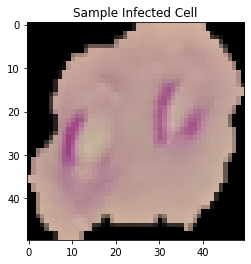

In [37]:
for img in parasitized_path.glob("*.png"):
   
    # print('for loop')

    img = keras.utils.load_img(img)
    
    # convert image to np array
    image_array =  keras.utils.img_to_array(img)
    
    #Data Augmentation
    # resizing
    image_array = transform.resize(image_array, new_shape, anti_aliasing=True)
    
    # scaling the image
    image_array /= 255
    images.append(image_array) 
    # if uninfected image then 0
    labels.append(1)
    
plt.imshow(images[-1])
plt.title('Sample Infected Cell')
"Dimensions of image: "
images[-1].shape

"images and labels"
len(images)
len(labels)

AxesImage(54,36;334.8x217.44)
1 means it is infected:
1


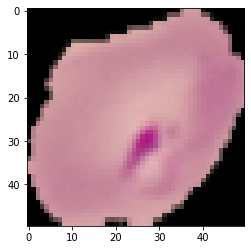

In [39]:
import gc
import os
from sklearn.utils import shuffle
gc.collect()

images, labels = shuffle(images, labels)

print(plt.imshow(images[-6]))
print("1 means it is infected:")

print(labels[-6])

In [40]:

x_data = np.array(images)
y_data = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state= 0)       

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print(f'X_train shape: {X_train.shape}')
print(f'X_test.shape: {X_test.shape}')

X_train shape: (22046, 50, 50, 3)
X_test.shape: (5512, 50, 50, 3)


In [ ]:

y_train[0:3]

array([0, 0, 0])

In [41]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train[0:3]

array([[1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [42]:
#CNN Model
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.models import load_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [48]:
model = Sequential([
    Conv2D(16, kernel_size=(3,3), activation='relu', input_shape=(50, 50, 3)),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.2),
    Conv2D(32, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.2),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.2),
    
    
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(2, activation='sigmoid') #Binary output 
])

In [49]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', # binary classification task
              metrics=['accuracy'])

In [50]:
# Train the model and test/validate the mode with the test data
hist = model.fit(X_train, y_train, batch_size=150, epochs=30, verbose=1, validation_data=(X_test, y_test))

Epoch 1/30
147/147 [==============================] - 48s 321ms/step - loss: 0.6435 - accuracy: 0.6331 - val_loss: 0.5999 - val_accuracy: 0.7059
Epoch 2/30
147/147 [==============================] - 49s 331ms/step - loss: 0.4166 - accuracy: 0.8127 - val_loss: 0.2418 - val_accuracy: 0.9004
Epoch 3/30
147/147 [==============================] - 47s 317ms/step - loss: 0.2261 - accuracy: 0.9133 - val_loss: 0.2133 - val_accuracy: 0.9213
Epoch 4/30
147/147 [==============================] - 45s 308ms/step - loss: 0.2064 - accuracy: 0.9262 - val_loss: 0.1944 - val_accuracy: 0.9332
Epoch 5/30
147/147 [==============================] - 45s 308ms/step - loss: 0.1959 - accuracy: 0.9324 - val_loss: 0.1826 - val_accuracy: 0.9432
Epoch 6/30
147/147 [==============================] - 45s 310ms/step - loss: 0.1827 - accuracy: 0.9392 - val_loss: 0.1791 - val_accuracy: 0.9363
Epoch 7/30
147/147 [==============================] - 45s 309ms/step - loss: 0.1744 - accuracy: 0.9435 - val_loss: 0.1660 - val_ac

In [51]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.13018904626369476
Test accuracy: 0.9548258185386658


In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 48, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 24, 16)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 24, 24, 16)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 22, 22, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 11, 11, 32)       

In [53]:
model.save('malaria_model.h5')